In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

import sys
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf
import graph_funs as grf
import numerical_funs as nf
import general_funs as gef
import optics_funs as of
import finesse3_funs as f3f
import LCT_funs as lctf

import finesse
import finesse.ligo

import networkx as nx

In [ ]:
def LCT1D_xeta(xetas1, xetas2, q1, q2, M_abcd, lam=1064e-9):
    a,b,c,d = M_abcd.flatten()
    
    N1 = np.size(xetas1)
    N2 = np.size(xetas2)
    
    dx1 = xetas1[1] - xetas2[0]
    dx2 = xetas2[1] - xetas2[0]

    arg = np.zeros([N2,N1],dtype=np.complex128)
    for i, xeta1 in enumerate(xetas1):
        arg[:,i] = (d*q2*xetas2**2 - 2*np.sqrt(q1)*np.sqrt(q2)*xeta1*xetas2 + a*q1*xeta1**2)
        
    DLCT = dx1*np.sqrt(np.pi*q1/b) * np.exp(2*arg/(b))
    
    return DLCT

[<AxesSubplot:ylabel='Real part'>, <AxesSubplot:ylabel='Imaginary part'>]

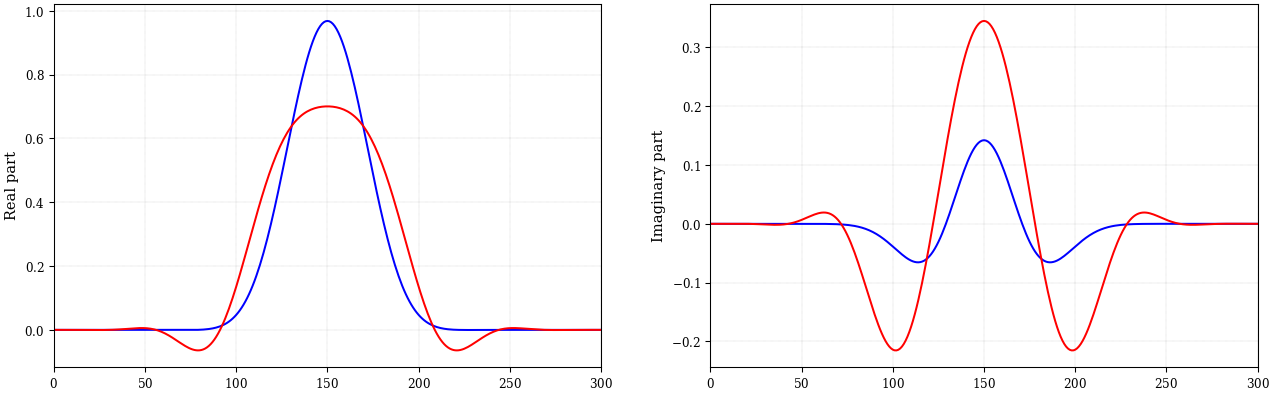

In [ ]:
lam = 1064e-9
k = 2*np.pi/lam

q0 = 1j
q1 = q0 + 0.3
w1 = of.q.get_w(q1)
xs1 = np.linspace(-1,1,301)*5*w1

zetas1 = np.sqrt(-1j*k/(2*q1))*xs1

d = 1
q2 = q1 + d
w2 = of.q.get_w(q2)
zetas2 = np.sqrt(-1j*k/(2*q2))*xs1

u0z1 = np.sqrt(q0/q1) * np.exp(zetas1**2)
u0z2 = np.sqrt(q0/q2) * np.exp(zetas2**2)

md = of.abcd.space(d)
D = LCT1D_xeta(zetas1, zetas2, q1, q2, M_abcd=md)

mpf.complex_plot(u0z1)
mpf.complex_plot(u0z2)

In [ ]:
plt.plot(np.abs(D@u0z1)/np.max(np.abs(D@u0z1)))
plt.plot(np.abs(u0z2)/np.max(np.abs(u0z2)))

(<Figure size 1075.2x384 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

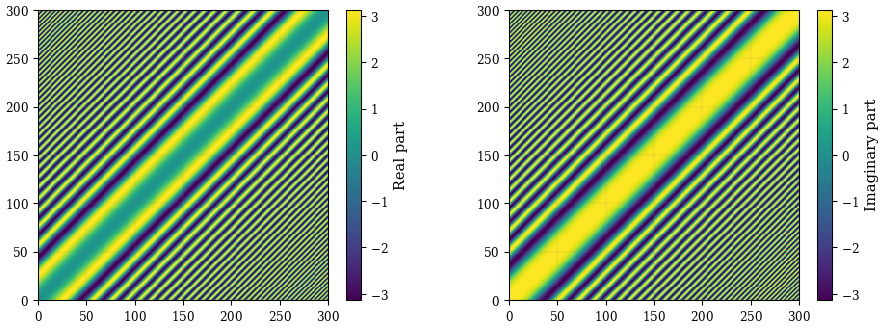

In [ ]:
mpf.complex_imshow(D)